# this notebook is for Week5-Assignment-attempts to get full free energy surface
# author: Rui Zeng, N15471955, rz2522@nyu.edu
# parameters of 9 attempts 
# 1:T300-450K, dT=50K, 4 replicas
# 2:T300-450K, dT=50K, 4 replicas, repeat attempt 1
# 3:T300-540K, dT=80K, 4 replicas
# 4:T300-600K, dT=100K, 4 replicas
# 5:T300-660K, dT=120K, 4 replicas
# 6:T300-460K, dT=80K, 3 replicas
# 7:T300-750K, dT=150K, 4 replicas
# 8:T300-900K, dT=200K, 4 replicas
# 9:T300-540K, dT=30K, 7 replicas

In [2]:
# import libraries
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

c:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


stable state 1 : [-2.45044227] [2.70176968]
free energy: 0.12
stable state 2 : [-1.44513262] [1.0681415]
free energy: 0.00


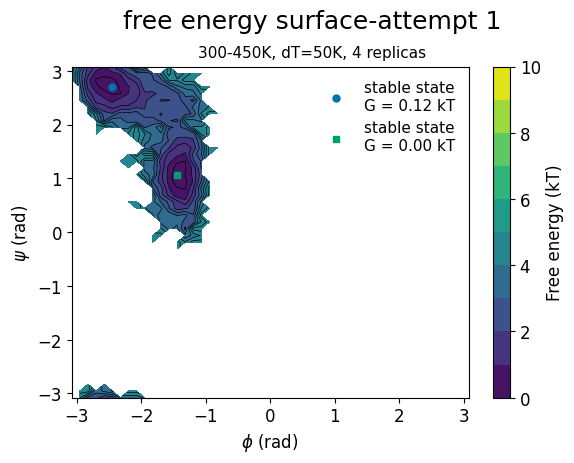

In [8]:
# preparation for figure 3: free energy surface-T300K-attempt1
# load trajectory data
trr_file = '../Data/attempt_1_300_450_dT50/T300/adp_exchange4temps.trr'
gro_file = '../Data/attempt_1_300_450_dT50/T300/adp_exchange4temps.gro'
traj = md.load(trr_file, top=gro_file)
# compute phi and psi
phi = md.compute_phi(traj)
psi = md.compute_psi(traj)
# compute free energy and normalize
H, xedges, yedges = np.histogram2d(phi[1][:,0], psi[1][:,0], bins=50, range=[[-np.pi, np.pi], [-np.pi, np.pi]])
F = -np.log(H)
F -= F.min()
# set min and max of free energy
Fmin, Fmax = 0, 10

# figure 3: free energy surface-T300K
fig=plt.figure(3)

# free energy surface & contour lines
# set the contour levels
levels = np.linspace(Fmin, Fmax, 11)
# compute the midpoints of the bins
x = 0.5*(xedges[1:] + xedges[:-1])
y = 0.5*(yedges[1:] + yedges[:-1])
# plot the free energy, colorblind-friendly
plt.contourf(x, y, F.T, levels=levels)
# colorbar, 0 to 8, fontsize = 12, only show ticks at 0, 2, 4, 6, 8, 10
cbar = plt.colorbar(ticks=[0, 2, 4, 6, 8, 10])
cbar.ax.tick_params(labelsize=12)
# add labels to the colorbar, fontsize = 12
cbar.set_label('Free energy (kT)', fontsize=12)
# plot the contour lines, colorblind-friendly
plt.contour(x, y, F.T, levels=10, colors='k', linewidths=0.5)

# labels & title
# labels, fontsize = 12
plt.xlabel('$\phi$ (rad)', fontsize=12)
plt.ylabel('$\psi$ (rad)', fontsize=12)
# two lines of title
plt.text(x=0.5, y=0.88, s="free energy surface-attempt 1", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.82, s= "300-450K, dT=50K, 4 replicas", fontsize=11, ha="center", transform=fig.transFigure)
plt.subplots_adjust(top=0.8, wspace=0.3)
# modify the tick labels to be fontsize = 12
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# this part can be commented out (need further debugging)
# stable states finding (semi-manual)
# parameters (setting after seeing the plot)
N_stable = 3
# area = [psi_min, psi_max, phi_min, phi_max] = [y,y,x,x]
area=[[-np.pi, np.pi, -np.pi, -np.pi/2], [-np.pi, np.pi, -np.pi/2, 0], [-np.pi, np.pi, 0, np.pi]]
# blind-friendly colors & shapes
colors = ['#0072B2', '#009E73', '#D55E00']
shapes = ['o', 's', 'd']
# find the stable states
for i in range(0,3):
    xidx = np.where((x>area[i][2]) & (x<area[i][3]))
    yidx = np.where((y>area[i][0]) & (y<area[i][1]))
    # find the minimum value in the area of interest
    idx = np.argpartition(F[xidx[0], :][:, yidx[0]].flatten(), 1)[:1]
    # convert the indices to x and y indices
    px1, px2 = np.unravel_index(idx, F[xidx[0], :][:, yidx[0]].shape)
    # check if px1,px1 is the stable state
    if (F[xidx[0][px1], yidx[0][px2]] < Fmin+4): # if the free energy is less than 4, it is a stable state
        # if yes, print the coordinates of the stable state and the free energy
        print("stable state", 1+i, ":", x[xidx[0][px1]], y[yidx[0][px2]])
        # format the F value to 2 decimal places
        Fval = "{:.2f}".format(round(float(F[xidx[0][px1], yidx[0][px2]]), 2))
        print("free energy:", Fval)
        # plot the stable state, colorblind-friendly, scatter plot
        plt.scatter(x[xidx[0][px1]], y[yidx[0][px2]], color=colors[i], marker=shapes[i], s=25, label='stable state\nG = '+Fval+' kT')
        # right top corner legend, fontsize = 11
        plt.legend(loc='upper right', fontsize=11, frameon=False)
    i+=1

# save figure as pdf in ../Figures/9_attempts_for_full_surface
fname = '../Figures/9_attempts_for_full_surface/attempt-1-[300-450K][dT50][4replicas].pdf'
plt.savefig(fname, format='pdf', dpi=300, bbox_inches='tight')



c:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


stable state 1 : [-2.57610598] [2.82743339]
free energy: 0.08
stable state 2 : [-1.44513262] [1.0681415]
free energy: 0.00


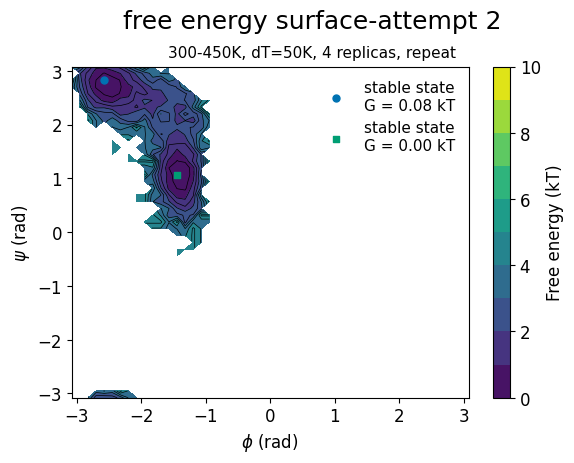

In [9]:
# preparation for figure 3: free energy surface-T300K-attempt2
# load trajectory
trr_file = '../Data/attempt_2_300_450_dT50_repeat/T300/adp_exchange4temps.trr'
gro_file = '../Data/attempt_2_300_450_dT50_repeat/T300/adp_exchange4temps.gro'
traj = md.load(trr_file, top=gro_file)
# compute phi and psi
phi = md.compute_phi(traj)
psi = md.compute_psi(traj)
# compute free energy and normalize
H, xedges, yedges = np.histogram2d(phi[1][:,0], psi[1][:,0], bins=50, range=[[-np.pi, np.pi], [-np.pi, np.pi]])
F = -np.log(H)
F -= F.min()
# set min and max of free energy
Fmin, Fmax = 0, 10

# figure 3: free energy surface-T300K
fig=plt.figure(3)

# free energy surface & contour lines
# set the contour levels
levels = np.linspace(Fmin, Fmax, 11)
# compute the midpoints of the bins
x = 0.5*(xedges[1:] + xedges[:-1])
y = 0.5*(yedges[1:] + yedges[:-1])
# plot the free energy, colorblind-friendly
plt.contourf(x, y, F.T, levels=levels)
# colorbar, 0 to 8, fontsize = 12, only show ticks at 0, 2, 4, 6, 8, 10
cbar = plt.colorbar(ticks=[0, 2, 4, 6, 8, 10])
cbar.ax.tick_params(labelsize=12)
# add labels to the colorbar, fontsize = 12
cbar.set_label('Free energy (kT)', fontsize=12)
# plot the contour lines, colorblind-friendly
plt.contour(x, y, F.T, levels=10, colors='k', linewidths=0.5)

# labels & title
# labels, fontsize = 12
plt.xlabel('$\phi$ (rad)', fontsize=12)
plt.ylabel('$\psi$ (rad)', fontsize=12)
# two lines of title
plt.text(x=0.5, y=0.88, s="free energy surface-attempt 2", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.82, s= "300-450K, dT=50K, 4 replicas, repeat", fontsize=11, ha="center", transform=fig.transFigure)
plt.subplots_adjust(top=0.8, wspace=0.3)
# modify the tick labels to be fontsize = 12
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# this part can be commented out (need further debugging)
# stable states finding (semi-manual)
# parameters (setting after seeing the plot)
N_stable = 3
# area = [psi_min, psi_max, phi_min, phi_max] = [y,y,x,x]
area=[[-np.pi, np.pi, -np.pi, -np.pi/2], [-np.pi, np.pi, -np.pi/2, 0], [-np.pi, np.pi, 0, np.pi]]
# blind-friendly colors & shapes
colors = ['#0072B2', '#009E73', '#D55E00']
shapes = ['o', 's', 'd']
# find the stable states
for i in range(0,3):
    xidx = np.where((x>area[i][2]) & (x<area[i][3]))
    yidx = np.where((y>area[i][0]) & (y<area[i][1]))
    # find the minimum value in the area of interest
    idx = np.argpartition(F[xidx[0], :][:, yidx[0]].flatten(), 1)[:1]
    # convert the indices to x and y indices
    px1, px2 = np.unravel_index(idx, F[xidx[0], :][:, yidx[0]].shape)
    # check if px1,px1 is the stable state
    if (F[xidx[0][px1], yidx[0][px2]] < Fmin+4): # if the free energy is less than 4, it is a stable state
        # if yes, print the coordinates of the stable state and the free energy
        print("stable state", 1+i, ":", x[xidx[0][px1]], y[yidx[0][px2]])
        # format the F value to 2 decimal places
        Fval = "{:.2f}".format(round(float(F[xidx[0][px1], yidx[0][px2]]), 2))
        print("free energy:", Fval)
        # plot the stable state, colorblind-friendly, scatter plot
        plt.scatter(x[xidx[0][px1]], y[yidx[0][px2]], color=colors[i], marker=shapes[i], s=25, label='stable state\nG = '+Fval+' kT')
        # right top corner legend, fontsize = 11
        plt.legend(loc='upper right', fontsize=11, frameon=False)
    i+=1

# save figure as pdf in ../Figures/9_attempts_for_full_surface
fname = '../Figures/9_attempts_for_full_surface/attempt-2-[300-450K][dT50][4replicas][repeat].pdf'
plt.savefig(fname, format='pdf', dpi=300, bbox_inches='tight')



c:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


stable state 1 : [-2.57610598] [2.70176968]
free energy: 0.00
stable state 2 : [-1.44513262] [1.0681415]
free energy: 0.21


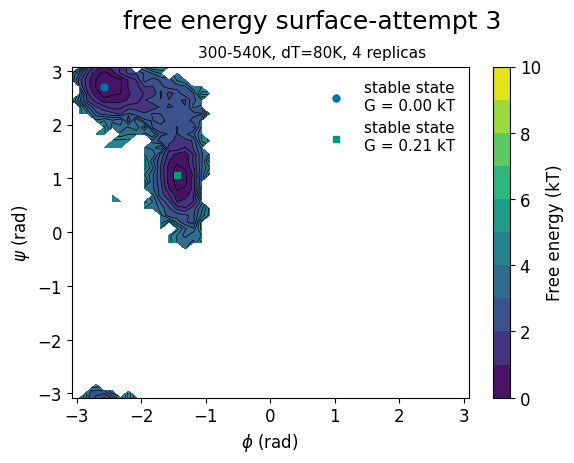

In [10]:
# preparation for figure 3: free energy surface-T300K-attempt3
# load trajectory
trr_file = '../Data/attempt_3_300_540_dT80/T300/adp_exchange4temps.trr'
gro_file = '../Data/attempt_3_300_540_dT80/T300/adp_exchange4temps.gro'
traj = md.load(trr_file, top=gro_file)
# compute phi and psi
phi = md.compute_phi(traj)
psi = md.compute_psi(traj)
# compute free energy and normalize
H, xedges, yedges = np.histogram2d(phi[1][:,0], psi[1][:,0], bins=50, range=[[-np.pi, np.pi], [-np.pi, np.pi]])
F = -np.log(H)
F -= F.min()
# set min and max of free energy
Fmin, Fmax = 0, 10

# figure 3: free energy surface-T300K
fig=plt.figure(3)

# free energy surface & contour lines
# set the contour levels
levels = np.linspace(Fmin, Fmax, 11)
# compute the midpoints of the bins
x = 0.5*(xedges[1:] + xedges[:-1])
y = 0.5*(yedges[1:] + yedges[:-1])
# plot the free energy, colorblind-friendly
plt.contourf(x, y, F.T, levels=levels)
# colorbar, 0 to 8, fontsize = 12, only show ticks at 0, 2, 4, 6, 8, 10
cbar = plt.colorbar(ticks=[0, 2, 4, 6, 8, 10])
cbar.ax.tick_params(labelsize=12)
# add labels to the colorbar, fontsize = 12
cbar.set_label('Free energy (kT)', fontsize=12)
# plot the contour lines, colorblind-friendly
plt.contour(x, y, F.T, levels=10, colors='k', linewidths=0.5)

# labels & title
# labels, fontsize = 12
plt.xlabel('$\phi$ (rad)', fontsize=12)
plt.ylabel('$\psi$ (rad)', fontsize=12)
# two lines of title
plt.text(x=0.5, y=0.88, s="free energy surface-attempt 3", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.82, s= "300-540K, dT=80K, 4 replicas", fontsize=11, ha="center", transform=fig.transFigure)
plt.subplots_adjust(top=0.8, wspace=0.3)
# modify the tick labels to be fontsize = 12
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# this part can be commented out (need further debugging)
# stable states finding (semi-manual)
# parameters (setting after seeing the plot)
N_stable = 3
# area = [psi_min, psi_max, phi_min, phi_max] = [y,y,x,x]
area=[[-np.pi, np.pi, -np.pi, -np.pi/2], [-np.pi, np.pi, -np.pi/2, 0], [-np.pi, np.pi, 0, np.pi]]
# blind-friendly colors & shapes
colors = ['#0072B2', '#009E73', '#D55E00']
shapes = ['o', 's', 'd']
# find the stable states
for i in range(0,3):
    xidx = np.where((x>area[i][2]) & (x<area[i][3]))
    yidx = np.where((y>area[i][0]) & (y<area[i][1]))
    # find the minimum value in the area of interest
    idx = np.argpartition(F[xidx[0], :][:, yidx[0]].flatten(), 1)[:1]
    # convert the indices to x and y indices
    px1, px2 = np.unravel_index(idx, F[xidx[0], :][:, yidx[0]].shape)
    # check if px1,px1 is the stable state
    if (F[xidx[0][px1], yidx[0][px2]] < Fmin+4): # if the free energy is less than 4, it is a stable state
        # if yes, print the coordinates of the stable state and the free energy
        print("stable state", 1+i, ":", x[xidx[0][px1]], y[yidx[0][px2]])
        # format the F value to 2 decimal places
        Fval = "{:.2f}".format(round(float(F[xidx[0][px1], yidx[0][px2]]), 2))
        print("free energy:", Fval)
        # plot the stable state, colorblind-friendly, scatter plot
        plt.scatter(x[xidx[0][px1]], y[yidx[0][px2]], color=colors[i], marker=shapes[i], s=25, label='stable state\nG = '+Fval+' kT')
        # right top corner legend, fontsize = 11
        plt.legend(loc='upper right', fontsize=11, frameon=False)
    i+=1

# save figure as pdf in ../Figures/9_attempts_for_full_surface
fname = '../Figures/9_attempts_for_full_surface/attempt-3-[300-540K][dT80][4replicas].pdf'
plt.savefig(fname, format='pdf', dpi=300, bbox_inches='tight')



c:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


stable state 1 : [-2.45044227] [2.82743339]
free energy: 0.01
stable state 2 : [-1.44513262] [1.0681415]
free energy: 0.00


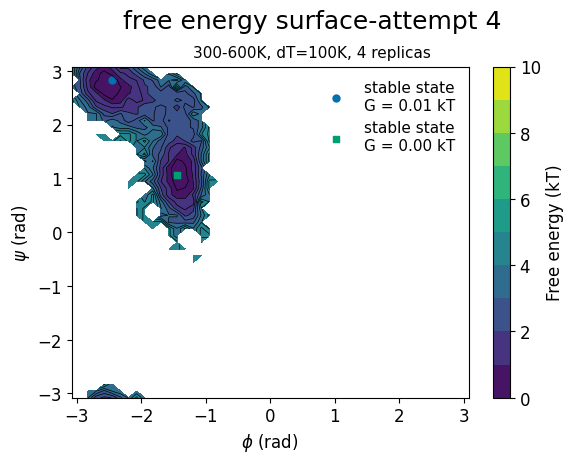

In [11]:
# preparation for figure 3: free energy surface-T300K-attempt4
# load trajectory
trr_file = '../Data/attempt_4_300_600_dT100/T300/adp_exchange4temps.trr'
gro_file = '../Data/attempt_4_300_600_dT100/T300/adp_exchange4temps.gro'
traj = md.load(trr_file, top=gro_file)
# compute phi and psi
phi = md.compute_phi(traj)
psi = md.compute_psi(traj)
# compute free energy and normalize
H, xedges, yedges = np.histogram2d(phi[1][:,0], psi[1][:,0], bins=50, range=[[-np.pi, np.pi], [-np.pi, np.pi]])
F = -np.log(H)
F -= F.min()
# set min and max of free energy
Fmin, Fmax = 0, 10

# figure 3: free energy surface-T300K
fig=plt.figure(3)

# free energy surface & contour lines
# set the contour levels
levels = np.linspace(Fmin, Fmax, 11)
# compute the midpoints of the bins
x = 0.5*(xedges[1:] + xedges[:-1])
y = 0.5*(yedges[1:] + yedges[:-1])
# plot the free energy, colorblind-friendly
plt.contourf(x, y, F.T, levels=levels)
# colorbar, 0 to 8, fontsize = 12, only show ticks at 0, 2, 4, 6, 8, 10
cbar = plt.colorbar(ticks=[0, 2, 4, 6, 8, 10])
cbar.ax.tick_params(labelsize=12)
# add labels to the colorbar, fontsize = 12
cbar.set_label('Free energy (kT)', fontsize=12)
# plot the contour lines, colorblind-friendly
plt.contour(x, y, F.T, levels=10, colors='k', linewidths=0.5)

# labels & title
# labels, fontsize = 12
plt.xlabel('$\phi$ (rad)', fontsize=12)
plt.ylabel('$\psi$ (rad)', fontsize=12)
# two lines of title
plt.text(x=0.5, y=0.88, s="free energy surface-attempt 4", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.82, s= "300-600K, dT=100K, 4 replicas", fontsize=11, ha="center", transform=fig.transFigure)
plt.subplots_adjust(top=0.8, wspace=0.3)
# modify the tick labels to be fontsize = 12
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# this part can be commented out (need further debugging)
# stable states finding (semi-manual)
# parameters (setting after seeing the plot)
N_stable = 3
# area = [psi_min, psi_max, phi_min, phi_max] = [y,y,x,x]
area=[[-np.pi, np.pi, -np.pi, -np.pi/2], [-np.pi, np.pi, -np.pi/2, 0], [-np.pi, np.pi, 0, np.pi]]
# blind-friendly colors & shapes
colors = ['#0072B2', '#009E73', '#D55E00']
shapes = ['o', 's', 'd']
# find the stable states
for i in range(0,3):
    xidx = np.where((x>area[i][2]) & (x<area[i][3]))
    yidx = np.where((y>area[i][0]) & (y<area[i][1]))
    # find the minimum value in the area of interest
    idx = np.argpartition(F[xidx[0], :][:, yidx[0]].flatten(), 1)[:1]
    # convert the indices to x and y indices
    px1, px2 = np.unravel_index(idx, F[xidx[0], :][:, yidx[0]].shape)
    # check if px1,px1 is the stable state
    if (F[xidx[0][px1], yidx[0][px2]] < Fmin+4): # if the free energy is less than 4, it is a stable state
        # if yes, print the coordinates of the stable state and the free energy
        print("stable state", 1+i, ":", x[xidx[0][px1]], y[yidx[0][px2]])
        # format the F value to 2 decimal places
        Fval = "{:.2f}".format(round(float(F[xidx[0][px1], yidx[0][px2]]), 2))
        print("free energy:", Fval)
        # plot the stable state, colorblind-friendly, scatter plot
        plt.scatter(x[xidx[0][px1]], y[yidx[0][px2]], color=colors[i], marker=shapes[i], s=25, label='stable state\nG = '+Fval+' kT')
        # right top corner legend, fontsize = 11
        plt.legend(loc='upper right', fontsize=11, frameon=False)
    i+=1

# save figure as pdf in ../Figures/9_attempts_for_full_surface
fname = '../Figures/9_attempts_for_full_surface/attempt-4-[300-600K][dT100][4replicas].pdf'
plt.savefig(fname, format='pdf', dpi=300, bbox_inches='tight')




c:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


stable state 1 : [-2.57610598] [2.82743339]
free energy: 0.00
stable state 2 : [-1.31946891] [1.0681415]
free energy: 0.00
stable state 3 : [1.0681415] [-0.9424778]
free energy: 2.83


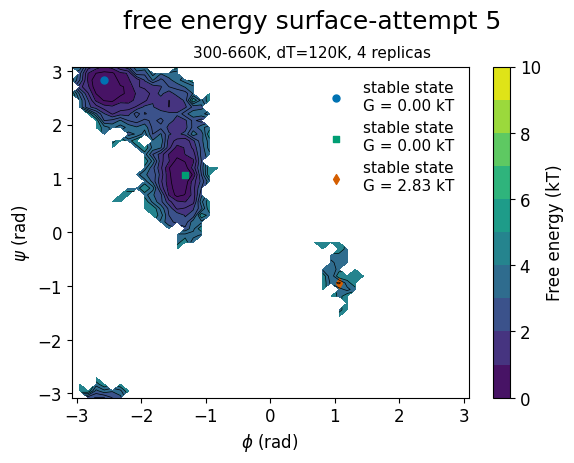

In [13]:
# preparation for figure 3: free energy surface-T300K-attempt5
# load trajectory
trr_file = '../Data/attempt_5_300_660_dT120/T300/adp_exchange4temps.trr'
gro_file = '../Data/attempt_5_300_660_dT120/T300/adp_exchange4temps.gro'
traj = md.load(trr_file, top=gro_file)
# compute phi and psi
phi = md.compute_phi(traj)
psi = md.compute_psi(traj)
# compute free energy and normalize
H, xedges, yedges = np.histogram2d(phi[1][:,0], psi[1][:,0], bins=50, range=[[-np.pi, np.pi], [-np.pi, np.pi]])
F = -np.log(H)
F -= F.min()
# set min and max of free energy
Fmin, Fmax = 0, 10

# figure 3: free energy surface-T300K
fig=plt.figure(3)

# free energy surface & contour lines
# set the contour levels
levels = np.linspace(Fmin, Fmax, 11)
# compute the midpoints of the bins
x = 0.5*(xedges[1:] + xedges[:-1])
y = 0.5*(yedges[1:] + yedges[:-1])
# plot the free energy, colorblind-friendly
plt.contourf(x, y, F.T, levels=levels)
# colorbar, 0 to 8, fontsize = 12, only show ticks at 0, 2, 4, 6, 8, 10
cbar = plt.colorbar(ticks=[0, 2, 4, 6, 8, 10])
cbar.ax.tick_params(labelsize=12)
# add labels to the colorbar, fontsize = 12
cbar.set_label('Free energy (kT)', fontsize=12)
# plot the contour lines, colorblind-friendly
plt.contour(x, y, F.T, levels=10, colors='k', linewidths=0.5)

# labels & title
# labels, fontsize = 12
plt.xlabel('$\phi$ (rad)', fontsize=12)
plt.ylabel('$\psi$ (rad)', fontsize=12)
# two lines of title
plt.text(x=0.5, y=0.88, s="free energy surface-attempt 5", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.82, s= "300-660K, dT=120K, 4 replicas", fontsize=11, ha="center", transform=fig.transFigure)
plt.subplots_adjust(top=0.8, wspace=0.3)
# modify the tick labels to be fontsize = 12
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# this part can be commented out (need further debugging)
# stable states finding (semi-manual)
# parameters (setting after seeing the plot)
N_stable = 3
# area = [psi_min, psi_max, phi_min, phi_max] = [y,y,x,x]
area=[[-np.pi, np.pi, -np.pi, -np.pi/2], [-np.pi, np.pi, -np.pi/2, 0], [-np.pi, np.pi, 0, np.pi]]
# blind-friendly colors & shapes
colors = ['#0072B2', '#009E73', '#D55E00']
shapes = ['o', 's', 'd']
# find the stable states
for i in range(0,3):
    xidx = np.where((x>area[i][2]) & (x<area[i][3]))
    yidx = np.where((y>area[i][0]) & (y<area[i][1]))
    # find the minimum value in the area of interest
    idx = np.argpartition(F[xidx[0], :][:, yidx[0]].flatten(), 1)[:1]
    # convert the indices to x and y indices
    px1, px2 = np.unravel_index(idx, F[xidx[0], :][:, yidx[0]].shape)
    # check if px1,px1 is the stable state
    if (F[xidx[0][px1], yidx[0][px2]] < Fmin+4): # if the free energy is less than 4, it is a stable state
        # if yes, print the coordinates of the stable state and the free energy
        print("stable state", 1+i, ":", x[xidx[0][px1]], y[yidx[0][px2]])
        # format the F value to 2 decimal places
        Fval = "{:.2f}".format(round(float(F[xidx[0][px1], yidx[0][px2]]), 2))
        print("free energy:", Fval)
        # plot the stable state, colorblind-friendly, scatter plot
        plt.scatter(x[xidx[0][px1]], y[yidx[0][px2]], color=colors[i], marker=shapes[i], s=25, label='stable state\nG = '+Fval+' kT')
        # right top corner legend, fontsize = 11
        plt.legend(loc='upper right', fontsize=11, frameon=False)
    i+=1

# save figure as pdf in ../Figures/9_attempts_for_full_surface
fname = '../Figures/9_attempts_for_full_surface/[success]attempt-5-[300-660K][dT120][4replicas].pdf'
plt.savefig(fname, format='pdf', dpi=300, bbox_inches='tight')



c:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


stable state 1 : [-2.45044227] [2.70176968]
free energy: 0.13
stable state 2 : [-1.44513262] [0.9424778]
free energy: 0.00


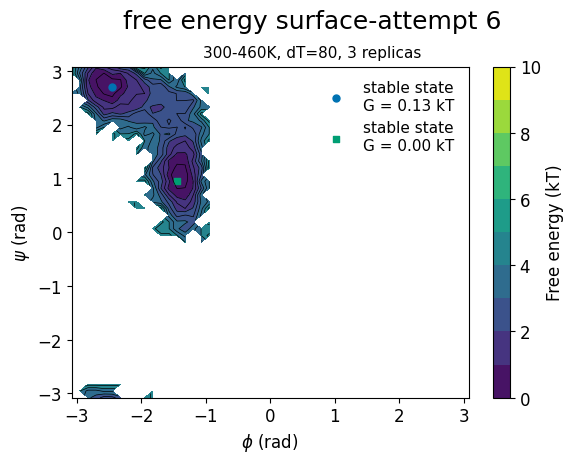

In [14]:
# preparation for figure 3: free energy surface-T300K-attempt6
# load trajectory
trr_file = '../Data/attempt_6_300_460_dT80_3T/T300/adp_exchange3temps.trr'
gro_file = '../Data/attempt_6_300_460_dT80_3T/T300/adp_exchange3temps.gro'
traj = md.load(trr_file, top=gro_file)
# compute phi and psi
phi = md.compute_phi(traj)
psi = md.compute_psi(traj)
# compute free energy and normalize
H, xedges, yedges = np.histogram2d(phi[1][:,0], psi[1][:,0], bins=50, range=[[-np.pi, np.pi], [-np.pi, np.pi]])
F = -np.log(H)
F -= F.min()
# set min and max of free energy
Fmin, Fmax = 0, 10

# figure 3: free energy surface-T300K
fig=plt.figure(3)

# free energy surface & contour lines
# set the contour levels
levels = np.linspace(Fmin, Fmax, 11)
# compute the midpoints of the bins
x = 0.5*(xedges[1:] + xedges[:-1])
y = 0.5*(yedges[1:] + yedges[:-1])
# plot the free energy, colorblind-friendly
plt.contourf(x, y, F.T, levels=levels)
# colorbar, 0 to 8, fontsize = 12, only show ticks at 0, 2, 4, 6, 8, 10
cbar = plt.colorbar(ticks=[0, 2, 4, 6, 8, 10])
cbar.ax.tick_params(labelsize=12)
# add labels to the colorbar, fontsize = 12
cbar.set_label('Free energy (kT)', fontsize=12)
# plot the contour lines, colorblind-friendly
plt.contour(x, y, F.T, levels=10, colors='k', linewidths=0.5)

# labels & title
# labels, fontsize = 12
plt.xlabel('$\phi$ (rad)', fontsize=12)
plt.ylabel('$\psi$ (rad)', fontsize=12)
# two lines of title
plt.text(x=0.5, y=0.88, s="free energy surface-attempt 6", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.82, s= "300-460K, dT=80, 3 replicas", fontsize=11, ha="center", transform=fig.transFigure)
plt.subplots_adjust(top=0.8, wspace=0.3)
# modify the tick labels to be fontsize = 12
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# this part can be commented out (need further debugging)
# stable states finding (semi-manual)
# parameters (setting after seeing the plot)
N_stable = 3
# area = [psi_min, psi_max, phi_min, phi_max] = [y,y,x,x]
area=[[-np.pi, np.pi, -np.pi, -np.pi/2], [-np.pi, np.pi, -np.pi/2, 0], [-np.pi, np.pi, 0, np.pi]]
# blind-friendly colors & shapes
colors = ['#0072B2', '#009E73', '#D55E00']
shapes = ['o', 's', 'd']
# find the stable states
for i in range(0,3):
    xidx = np.where((x>area[i][2]) & (x<area[i][3]))
    yidx = np.where((y>area[i][0]) & (y<area[i][1]))
    # find the minimum value in the area of interest
    idx = np.argpartition(F[xidx[0], :][:, yidx[0]].flatten(), 1)[:1]
    # convert the indices to x and y indices
    px1, px2 = np.unravel_index(idx, F[xidx[0], :][:, yidx[0]].shape)
    # check if px1,px1 is the stable state
    if (F[xidx[0][px1], yidx[0][px2]] < Fmin+4): # if the free energy is less than 4, it is a stable state
        # if yes, print the coordinates of the stable state and the free energy
        print("stable state", 1+i, ":", x[xidx[0][px1]], y[yidx[0][px2]])
        # format the F value to 2 decimal places
        Fval = "{:.2f}".format(round(float(F[xidx[0][px1], yidx[0][px2]]), 2))
        print("free energy:", Fval)
        # plot the stable state, colorblind-friendly, scatter plot
        plt.scatter(x[xidx[0][px1]], y[yidx[0][px2]], color=colors[i], marker=shapes[i], s=25, label='stable state\nG = '+Fval+' kT')
        # right top corner legend, fontsize = 11
        plt.legend(loc='upper right', fontsize=11, frameon=False)
    i+=1

# save figure as pdf in ../Figures/9_attempts_for_full_surface
fname = '../Figures/9_attempts_for_full_surface/attempt-6-[300-460K][dT80][3replicas].pdf'
plt.savefig(fname, format='pdf', dpi=300, bbox_inches='tight')




c:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


stable state 1 : [-2.57610598] [2.82743339]
free energy: 0.00
stable state 2 : [-1.44513262] [1.0681415]
free energy: 0.06
stable state 3 : [1.0681415] [-0.69115038]
free energy: 3.27


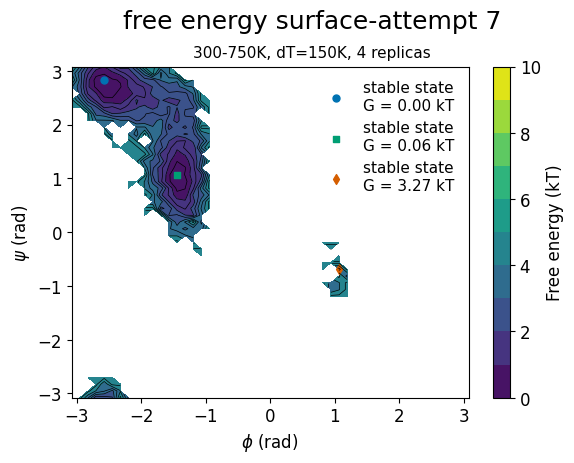

In [16]:
# preparation for figure 3: free energy surface-T300K-attempt7
# load trajectory
trr_file = '../Data/attempt_7_300_750_dT150/T300/adp_exchange4temps.trr'
gro_file = '../Data/attempt_7_300_750_dT150/T300/adp_exchange4temps.gro'
traj = md.load(trr_file, top=gro_file)
# compute phi and psi
phi = md.compute_phi(traj)
psi = md.compute_psi(traj)
# compute free energy and normalize
H, xedges, yedges = np.histogram2d(phi[1][:,0], psi[1][:,0], bins=50, range=[[-np.pi, np.pi], [-np.pi, np.pi]])
F = -np.log(H)
F -= F.min()
# set min and max of free energy
Fmin, Fmax = 0, 10

# figure 3: free energy surface-T300K
fig=plt.figure(3)

# free energy surface & contour lines
# set the contour levels
levels = np.linspace(Fmin, Fmax, 11)
# compute the midpoints of the bins
x = 0.5*(xedges[1:] + xedges[:-1])
y = 0.5*(yedges[1:] + yedges[:-1])
# plot the free energy, colorblind-friendly
plt.contourf(x, y, F.T, levels=levels)
# colorbar, 0 to 8, fontsize = 12, only show ticks at 0, 2, 4, 6, 8, 10
cbar = plt.colorbar(ticks=[0, 2, 4, 6, 8, 10])
cbar.ax.tick_params(labelsize=12)
# add labels to the colorbar, fontsize = 12
cbar.set_label('Free energy (kT)', fontsize=12)
# plot the contour lines, colorblind-friendly
plt.contour(x, y, F.T, levels=10, colors='k', linewidths=0.5)

# labels & title
# labels, fontsize = 12
plt.xlabel('$\phi$ (rad)', fontsize=12)
plt.ylabel('$\psi$ (rad)', fontsize=12)
# two lines of title
plt.text(x=0.5, y=0.88, s="free energy surface-attempt 7", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.82, s="300-750K, dT=150K, 4 replicas", fontsize=11, ha="center", transform=fig.transFigure)
plt.subplots_adjust(top=0.8, wspace=0.3)
# modify the tick labels to be fontsize = 12
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# this part can be commented out (need further debugging)
# stable states finding (semi-manual)
# parameters (setting after seeing the plot)
N_stable = 3
# area = [psi_min, psi_max, phi_min, phi_max] = [y,y,x,x]
area=[[-np.pi, np.pi, -np.pi, -np.pi/2], [-np.pi, np.pi, -np.pi/2, 0], [-np.pi, np.pi, 0, np.pi]]
# blind-friendly colors & shapes
colors = ['#0072B2', '#009E73', '#D55E00']
shapes = ['o', 's', 'd']
# find the stable states
for i in range(0,3):
    xidx = np.where((x>area[i][2]) & (x<area[i][3]))
    yidx = np.where((y>area[i][0]) & (y<area[i][1]))
    # find the minimum value in the area of interest
    idx = np.argpartition(F[xidx[0], :][:, yidx[0]].flatten(), 1)[:1]
    # convert the indices to x and y indices
    px1, px2 = np.unravel_index(idx, F[xidx[0], :][:, yidx[0]].shape)
    # check if px1,px1 is the stable state
    if (F[xidx[0][px1], yidx[0][px2]] < Fmin+4): # if the free energy is less than 4, it is a stable state
        # if yes, print the coordinates of the stable state and the free energy
        print("stable state", 1+i, ":", x[xidx[0][px1]], y[yidx[0][px2]])
        # format the F value to 2 decimal places
        Fval = "{:.2f}".format(round(float(F[xidx[0][px1], yidx[0][px2]]), 2))
        print("free energy:", Fval)
        # plot the stable state, colorblind-friendly, scatter plot
        plt.scatter(x[xidx[0][px1]], y[yidx[0][px2]], color=colors[i], marker=shapes[i], s=25, label='stable state\nG = '+Fval+' kT')
        # right top corner legend, fontsize = 11
        plt.legend(loc='upper right', fontsize=11, frameon=False)
    i+=1

# save figure as pdf in ../Figures/9_attempts_for_full_surface
fname = '../Figures/9_attempts_for_full_surface/[success]attempt-7-[300-750K][dT150][4replicas].pdf'
plt.savefig(fname, format='pdf', dpi=300, bbox_inches='tight')




c:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


stable state 1 : [-2.57610598] [2.70176968]
free energy: 0.00
stable state 2 : [-1.44513262] [1.0681415]
free energy: 0.05
stable state 3 : [1.0681415] [-1.0681415]
free energy: 2.80


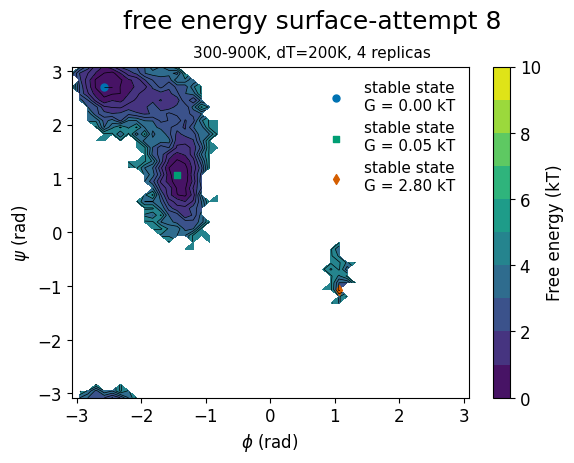

In [17]:
# preparation for figure 3: free energy surface-T300K-attempt8
# load trajectory
trr_file = '../Data/attempt_8_300_900_dT200/T300/adp_exchange4temps.trr'
gro_file = '../Data/attempt_8_300_900_dT200/T300/adp_exchange4temps.gro'
traj = md.load(trr_file, top=gro_file)
# compute phi and psi
phi = md.compute_phi(traj)
psi = md.compute_psi(traj)
# compute free energy and normalize
H, xedges, yedges = np.histogram2d(phi[1][:,0], psi[1][:,0], bins=50, range=[[-np.pi, np.pi], [-np.pi, np.pi]])
F = -np.log(H)
F -= F.min()
# set min and max of free energy
Fmin, Fmax = 0, 10

# figure 3: free energy surface-T300K
fig=plt.figure(3)

# free energy surface & contour lines
# set the contour levels
levels = np.linspace(Fmin, Fmax, 11)
# compute the midpoints of the bins
x = 0.5*(xedges[1:] + xedges[:-1])
y = 0.5*(yedges[1:] + yedges[:-1])
# plot the free energy, colorblind-friendly
plt.contourf(x, y, F.T, levels=levels)
# colorbar, 0 to 8, fontsize = 12, only show ticks at 0, 2, 4, 6, 8, 10
cbar = plt.colorbar(ticks=[0, 2, 4, 6, 8, 10])
cbar.ax.tick_params(labelsize=12)
# add labels to the colorbar, fontsize = 12
cbar.set_label('Free energy (kT)', fontsize=12)
# plot the contour lines, colorblind-friendly
plt.contour(x, y, F.T, levels=10, colors='k', linewidths=0.5)

# labels & title
# labels, fontsize = 12
plt.xlabel('$\phi$ (rad)', fontsize=12)
plt.ylabel('$\psi$ (rad)', fontsize=12)
# two lines of title
plt.text(x=0.5, y=0.88, s="free energy surface-attempt 8", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.82, s= "300-900K, dT=200K, 4 replicas", fontsize=11, ha="center", transform=fig.transFigure)
plt.subplots_adjust(top=0.8, wspace=0.3)
# modify the tick labels to be fontsize = 12
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# this part can be commented out (need further debugging)
# stable states finding (semi-manual)
# parameters (setting after seeing the plot)
N_stable = 3
# area = [psi_min, psi_max, phi_min, phi_max] = [y,y,x,x]
area=[[-np.pi, np.pi, -np.pi, -np.pi/2], [-np.pi, np.pi, -np.pi/2, 0], [-np.pi, np.pi, 0, np.pi]]
# blind-friendly colors & shapes
colors = ['#0072B2', '#009E73', '#D55E00']
shapes = ['o', 's', 'd']
# find the stable states
for i in range(0,3):
    xidx = np.where((x>area[i][2]) & (x<area[i][3]))
    yidx = np.where((y>area[i][0]) & (y<area[i][1]))
    # find the minimum value in the area of interest
    idx = np.argpartition(F[xidx[0], :][:, yidx[0]].flatten(), 1)[:1]
    # convert the indices to x and y indices
    px1, px2 = np.unravel_index(idx, F[xidx[0], :][:, yidx[0]].shape)
    # check if px1,px1 is the stable state
    if (F[xidx[0][px1], yidx[0][px2]] < Fmin+4): # if the free energy is less than 4, it is a stable state
        # if yes, print the coordinates of the stable state and the free energy
        print("stable state", 1+i, ":", x[xidx[0][px1]], y[yidx[0][px2]])
        # format the F value to 2 decimal places
        Fval = "{:.2f}".format(round(float(F[xidx[0][px1], yidx[0][px2]]), 2))
        print("free energy:", Fval)
        # plot the stable state, colorblind-friendly, scatter plot
        plt.scatter(x[xidx[0][px1]], y[yidx[0][px2]], color=colors[i], marker=shapes[i], s=25, label='stable state\nG = '+Fval+' kT')
        # right top corner legend, fontsize = 11
        plt.legend(loc='upper right', fontsize=11, frameon=False)
    i+=1

# save figure as pdf in ../Figures/9_attempts_for_full_surface
fname = '../Figures/9_attempts_for_full_surface/[success]attempt-8-[300-900K][dT200][4replicas].pdf'
plt.savefig(fname, format='pdf', dpi=300, bbox_inches='tight')




c:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


stable state 1 : [-2.57610598] [2.70176968]
free energy: 0.04
stable state 2 : [-1.44513262] [1.0681415]
free energy: 0.00
stable state 3 : [1.0681415] [-0.9424778]
free energy: 2.56


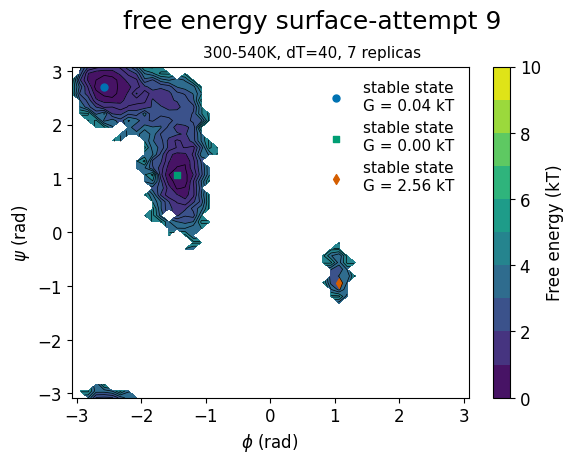

In [18]:
# preparation for figure 3: free energy surface-T300K-attempt9
# load trajectory
trr_file = '../Data/attempt_9_300_540_dT40_7T/T300/adp_exchange7temps.trr'
gro_file = '../Data/attempt_9_300_540_dT40_7T/T300/adp_exchange7temps.gro'
traj = md.load(trr_file, top=gro_file)
# compute phi and psi
phi = md.compute_phi(traj)
psi = md.compute_psi(traj)
# compute free energy and normalize
H, xedges, yedges = np.histogram2d(phi[1][:,0], psi[1][:,0], bins=50, range=[[-np.pi, np.pi], [-np.pi, np.pi]])
F = -np.log(H)
F -= F.min()
# set min and max of free energy
Fmin, Fmax = 0, 10

# figure 3: free energy surface-T300K
fig=plt.figure(3)

# free energy surface & contour lines
# set the contour levels
levels = np.linspace(Fmin, Fmax, 11)
# compute the midpoints of the bins
x = 0.5*(xedges[1:] + xedges[:-1])
y = 0.5*(yedges[1:] + yedges[:-1])
# plot the free energy, colorblind-friendly
plt.contourf(x, y, F.T, levels=levels)
# colorbar, 0 to 8, fontsize = 12, only show ticks at 0, 2, 4, 6, 8, 10
cbar = plt.colorbar(ticks=[0, 2, 4, 6, 8, 10])
cbar.ax.tick_params(labelsize=12)
# add labels to the colorbar, fontsize = 12
cbar.set_label('Free energy (kT)', fontsize=12)
# plot the contour lines, colorblind-friendly
plt.contour(x, y, F.T, levels=10, colors='k', linewidths=0.5)

# labels & title
# labels, fontsize = 12
plt.xlabel('$\phi$ (rad)', fontsize=12)
plt.ylabel('$\psi$ (rad)', fontsize=12)
# two lines of title
plt.text(x=0.5, y=0.88, s="free energy surface-attempt 9", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.82, s= "300-540K, dT=40, 7 replicas", fontsize=11, ha="center", transform=fig.transFigure)
plt.subplots_adjust(top=0.8, wspace=0.3)
# modify the tick labels to be fontsize = 12
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# this part can be commented out (need further debugging)
# stable states finding (semi-manual)
# parameters (setting after seeing the plot)
N_stable = 3
# area = [psi_min, psi_max, phi_min, phi_max] = [y,y,x,x]
area=[[-np.pi, np.pi, -np.pi, -np.pi/2], [-np.pi, np.pi, -np.pi/2, 0], [-np.pi, np.pi, 0, np.pi]]
# blind-friendly colors & shapes
colors = ['#0072B2', '#009E73', '#D55E00']
shapes = ['o', 's', 'd']
# find the stable states
for i in range(0,3):
    xidx = np.where((x>area[i][2]) & (x<area[i][3]))
    yidx = np.where((y>area[i][0]) & (y<area[i][1]))
    # find the minimum value in the area of interest
    idx = np.argpartition(F[xidx[0], :][:, yidx[0]].flatten(), 1)[:1]
    # convert the indices to x and y indices
    px1, px2 = np.unravel_index(idx, F[xidx[0], :][:, yidx[0]].shape)
    # check if px1,px1 is the stable state
    if (F[xidx[0][px1], yidx[0][px2]] < Fmin+4): # if the free energy is less than 4, it is a stable state
        # if yes, print the coordinates of the stable state and the free energy
        print("stable state", 1+i, ":", x[xidx[0][px1]], y[yidx[0][px2]])
        # format the F value to 2 decimal places
        Fval = "{:.2f}".format(round(float(F[xidx[0][px1], yidx[0][px2]]), 2))
        print("free energy:", Fval)
        # plot the stable state, colorblind-friendly, scatter plot
        plt.scatter(x[xidx[0][px1]], y[yidx[0][px2]], color=colors[i], marker=shapes[i], s=25, label='stable state\nG = '+Fval+' kT')
        # right top corner legend, fontsize = 11
        plt.legend(loc='upper right', fontsize=11, frameon=False)
    i+=1

# save figure as pdf in ../Figures/9_attempts_for_full_surface
fname = '../Figures/9_attempts_for_full_surface/[success]attempt-9-[300-540K][dT40][7replicas].pdf'
plt.savefig(fname, format='pdf', dpi=300, bbox_inches='tight')


